In [158]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

In [160]:
Train_data = pd.read_csv('Data_Part1/Train_data_part1.csv').values
Test_data = pd.read_csv('Data_Part1/Test_data_part1.csv').values

In [161]:
print(Test_data)

[['med' 'high' 5 'no' 'yes']
 ['low' 'low' 4 'no' 'yes']]


In [162]:
X_train = Train_data[:,:4]
Y_train = Train_data[:,4]

X_test = Test_data[:,:4]
Y_test = Test_data[:,4]

In [163]:
print(X_train)
print(Y_train)
print(X_test)

[['low' 'low' 2 'no']
 ['low' 'med' 4 'yes']
 ['low' 'high' 4 'no']
 ['med' 'med' 4 'no']
 ['med' 'med' 4 'yes']
 ['med' 'high' 2 'yes']
 ['high' 'med' 4 'yes']
 ['high' 'high' 2 'yes']
 ['high' 'high' 5 'yes']]
['yes' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'yes']
[['med' 'high' 5 'no']
 ['low' 'low' 4 'no']]


In [164]:
# Conversion of strings into integer types

# Price and Maintenance are ordinal variables, Airbag is a categorical variable.
# Profitable is also a categorical variable.
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

LE1 = LabelEncoder()
LE2 = LabelEncoder()
LE3 = LabelEncoder()
LE4 = LabelEncoder()


LE1.fit(X_train[:,3])
LE2.fit(Y_train)
LE3.fit(X_train[:,0])
LE4.fit(X_train[:,1])

X_train[:,3] = LE1.transform(X_train[:,3])
X_test[:,3] = LE1.transform(X_test[:,3])
Y_train = LE2.transform(Y_train)
Y_test = LE2.transform(Y_test)

X_train[:,0] = LE3.transform(X_train[:,0])
X_train[:,0] = np.where(X_train[:,0]==0,int(3),X_train[:,0])

X_test[:,0] = LE3.transform(X_test[:,0])
X_test[:,0] = np.where(X_test[:,0]==0,int(3),X_test[:,0])

X_train[:,1] = LE4.transform(X_train[:,1])
X_train[:,1] = np.where(X_train[:,1]==0,int(3),X_train[:,1])

X_test[:,1] = LE4.transform(X_test[:,1])
X_test[:,1] = np.where(X_test[:,1]==0,int(3),X_test[:,1])

In [165]:
print(X_train)
print("\n",X_test)

[[1 1 2 0]
 [1 2 4 1]
 [1 3 4 0]
 [2 2 4 0]
 [2 2 4 1]
 [2 3 2 1]
 [3 2 4 1]
 [3 3 2 1]
 [3 3 5 1]]

 [[2 3 5 0]
 [1 1 4 0]]


In [166]:
print(Y_train)

[1 0 0 0 1 0 1 0 1]


In [167]:
# Using Gini index
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)

In [168]:
print(Y_pred)

[1 1]


In [169]:
Test_acc = accuracy_score(Y_test,Y_pred)
print("Test Accuracy = ",Test_acc)

Test Accuracy =  1.0


In [170]:
print(DT.get_params())

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'random_state': None, 'max_leaf_nodes': None, 'min_samples_split': 2, 'splitter': 'best', 'max_features': None, 'presort': False, 'max_depth': None, 'class_weight': None, 'min_weight_fraction_leaf': 0.0, 'min_impurity_split': None}


In [171]:
#print(DT.decision_path(X_train))

In [172]:
#print(DT.feature_importances_)

In [173]:
import graphviz
from sklearn import tree

In [174]:
data = tree.export_graphviz(DT, out_file=None, feature_names=['price','maintenance','capacity','airbag'],filled=True
                           ,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph.render("Cars_gini")

'Cars_gini.pdf'

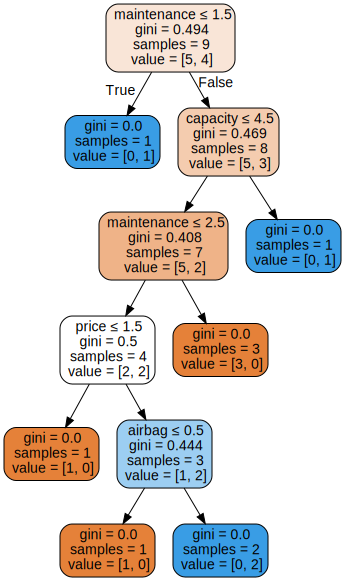

In [175]:
graph

In [176]:
# Using Information Gain
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)

In [177]:
print(Y_pred)
Test_acc = accuracy_score(Y_test,Y_pred)
print("Test Accuracy = ",Test_acc)

[0 1]
Test Accuracy =  0.5


In [178]:
data = tree.export_graphviz(DT, out_file=None, feature_names=['price','maintenance','capacity','airbag'],filled=True
                           ,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph.render("Cars_entropy")

'Cars_entropy.pdf'

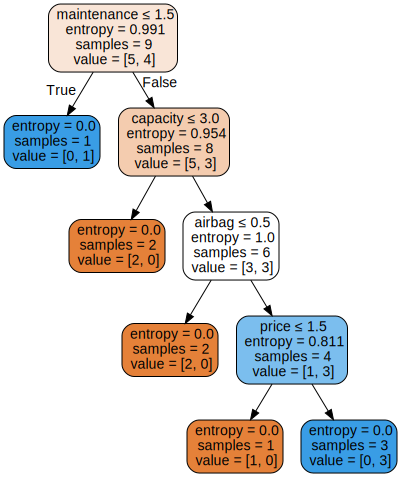

In [179]:
graph